In [55]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.colors as colors
import scipy.io

<Axes: >

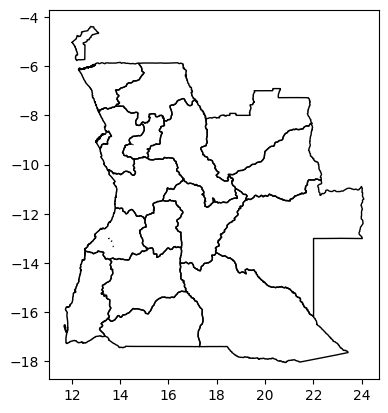

In [56]:
shp_path = "../data/external/Angola_provinces/SDE_DATA_AO_F7PROVINCES_2005.shp"
shp = gpd.read_file(shp_path)
shp.geometry.boundary.plot(color=None, edgecolor='k', linewidth = 1)

In [57]:
type(shp.geometry.values[0]), shp.crs, shp.total_bounds

(shapely.geometry.multipolygon.MultiPolygon,
 <Bound CRS: GEOGCS["NAD27",DATUM["North_American_Datum_1927",S ...>
 Name: NAD27
 Axis Info [ellipsoidal]:
 - lon[east]: Longitude (degree)
 - lat[north]: Latitude (degree)
 Area of Use:
 - undefined
 Coordinate Operation:
 - name: Transformation from NAD27 to WGS84
 - method: Position Vector transformation (geog2D domain)
 Datum: North American Datum 1927
 - Ellipsoid: Clarke 1866
 - Prime Meridian: Greenwich
 Source CRS: NAD27,
 array([ 11.674625, -18.041512,  24.090957,  -4.388041]))

In [58]:
tif_sample1 = "../data/processed/weekly_drought_labels/2015_04_20.tif"
with rio.open(tif_sample1) as src:
    sm = src.read(1)
    bounds = src.bounds
    crs = src.crs
sm.shape, bounds, crs

((189, 133),
 BoundingBox(left=11.716805458068848, bottom=-17.973846435546875, right=24.040456771850586, top=-4.4174346923828125),
 CRS.from_epsg(4326))

# Visualize TIFF file

In [64]:
def viz_tiff(date):
    tif_sample = f"../data/processed/weekly_drought_labels/{date}.tif"
    with rio.open(tif_sample) as src:
        sm = src.read(1)
        bounds = src.bounds
        crs = src.crs
    fig = plt.figure(figsize=(10, 10))
    img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.PlateCarree()) 

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                    alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                    xlabel_style={'size': 14}) #TODO: insert line styles later

    gl.xlabels_bottom = False
    gl.ylabels_right = False

    plot = ax.imshow(sm, cmap='GnBu', extent=img_extent)
    shp.geometry.boundary.plot(ax=ax, color='black', linewidth = 1)

    cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
    cbar = plt.colorbar(plot, cax=cbar_ax, orientation='horizontal', pad=0.05)
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label('RZSM', fontsize=18)

    fig.suptitle(f'{date}', fontsize=20)

    plt.savefig(f'../results/figures/{date}.png', dpi=300, bbox_inches='tight')

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


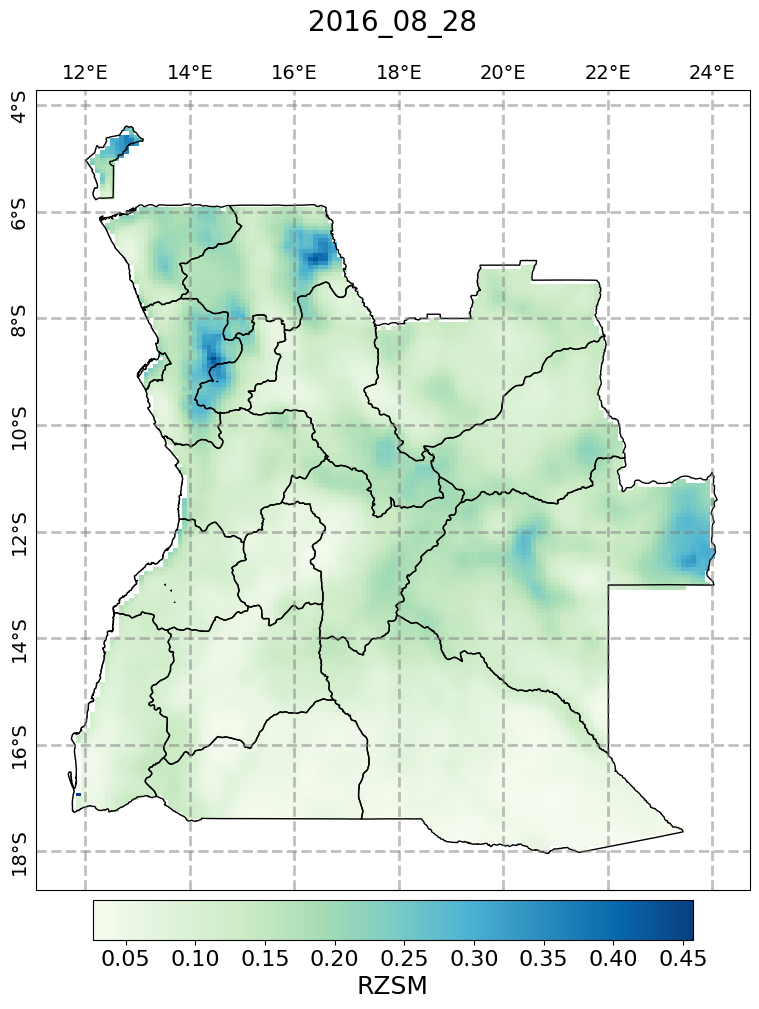

In [68]:
viz_tiff('2016_08_28')

## Visualize TIFF (Monthly)

In [16]:
# Let's create a colormap with 5 colors, to match the drought levels (USDM)
custom_colors = [
    "white",
    "yellow",
    "#FFDAB9",
    "orange",
    "red",
    "darkred",
]
cmap = colors.ListedColormap(custom_colors)

In [69]:
def viz_tiff_monthly(date):
    tif_sample = f"../data/processed/monthly_drought_labels/{date}.tif"
    with rio.open(tif_sample) as src:
        label = src.read(1)
        bounds = src.bounds
        crs = src.crs
    fig = plt.figure(figsize=(10, 10))
    img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.PlateCarree()) 

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                    alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                    xlabel_style={'size': 14}) #TODO: insert line styles later

    gl.xlabels_bottom = False
    gl.ylabels_right = False

    plot = ax.imshow(label, cmap=cmap, extent=img_extent)
    shp.geometry.boundary.plot(ax=ax, color='black', linewidth = 1)
    shp[shp.NAME == 'Kuando Kubango'].geometry.boundary.plot(ax=ax, color='blue', linewidth = 2)

    cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
    cbar = plt.colorbar(plot, cax=cbar_ax, orientation='horizontal', pad=0.05)
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label('USDM Drought Categories', fontsize=18)
    cbar.set_ticklabels(['None', 'D0','D1','D2','D3','D4'])
    cbar.set_ticks(np.linspace(0.35,3.65,6))

    fig.suptitle(f'{date}', fontsize=20)

    plt.savefig(f'../results/figures/{date}.png', dpi=300, bbox_inches='tight')

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\esl26\AppData\Local\Temp\ipykernel_35204\2085231318.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels(['None', 'D0','D1','D2','D3','D4'])


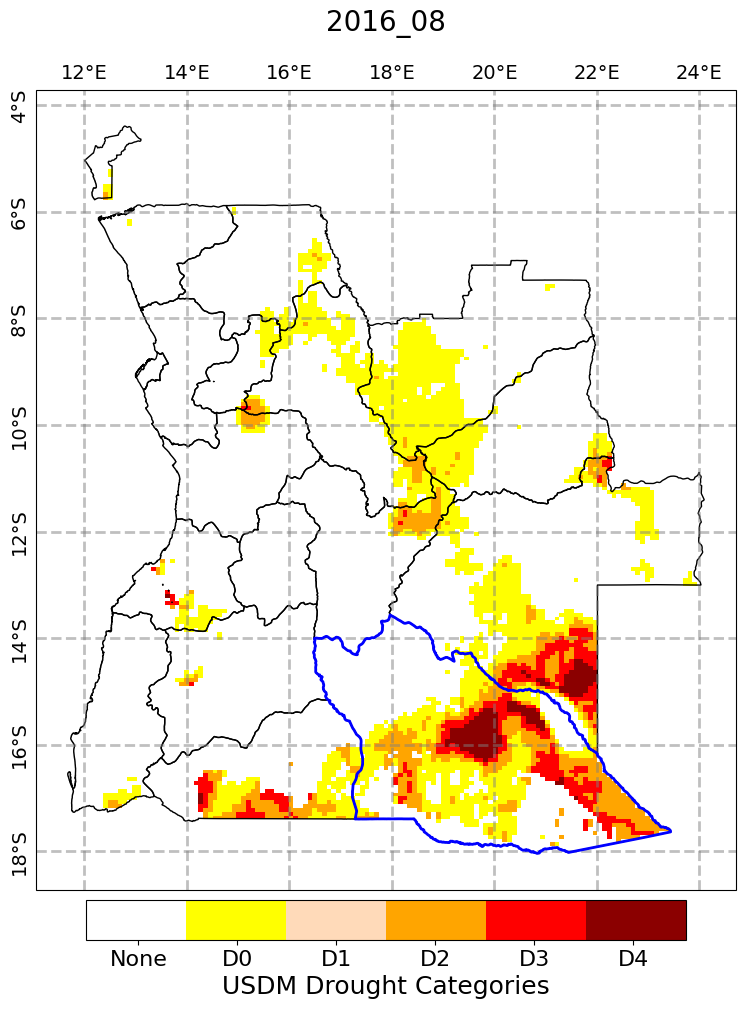

In [70]:
viz_tiff_monthly('2016_08')

# Porosity data
We have to convert the `porosity_9km.mat` file to numpy array

In [22]:
mat1 = scipy.io.loadmat('../data/raw/porosity/porosityAfrica.mat')
mat2 = scipy.io.loadmat('../data/raw/porosity/porosityAngola.mat')

In [23]:
porosity_africa = mat1['porosityAfrica']
porosity_angola = mat2['porosityAngola']
# porosity_africa
# porosity_angola

In [24]:
porosity_angola.shape

(189, 133)

## Check the contents of the MATLAB files (porosity for Africa and Angola)

C:\Users\esl26\AppData\Local\Temp\ipykernel_35204\3575880804.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


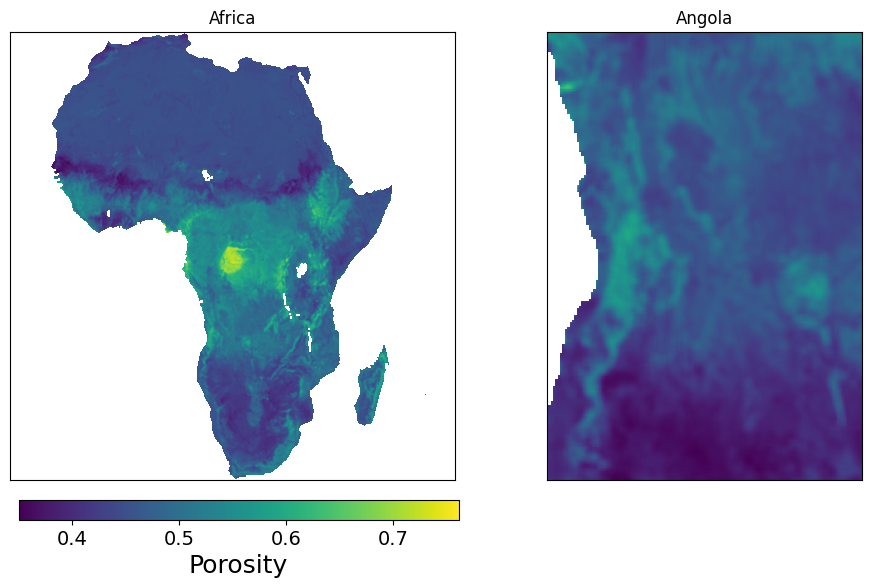

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plot1 = axes[0].imshow(porosity_africa)
axes[0].set_title('Africa')
axes[0].set_xticks([])
axes[0].set_yticks([])

plot2 = axes[1].imshow(porosity_angola)
axes[1].set_title('Angola')
axes[1].set_xticks([])
axes[1].set_yticks([])

cbar_ax = fig.add_axes([0.05, -0.05, 0.44, 0.04])
cbar = plt.colorbar(plot1, cax=cbar_ax, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Porosity', fontsize=18)
fig.tight_layout()
fig.savefig('../results/figures/porosity_africa_angola.png', dpi=300, bbox_inches='tight')

## Check the porosity in Angola

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


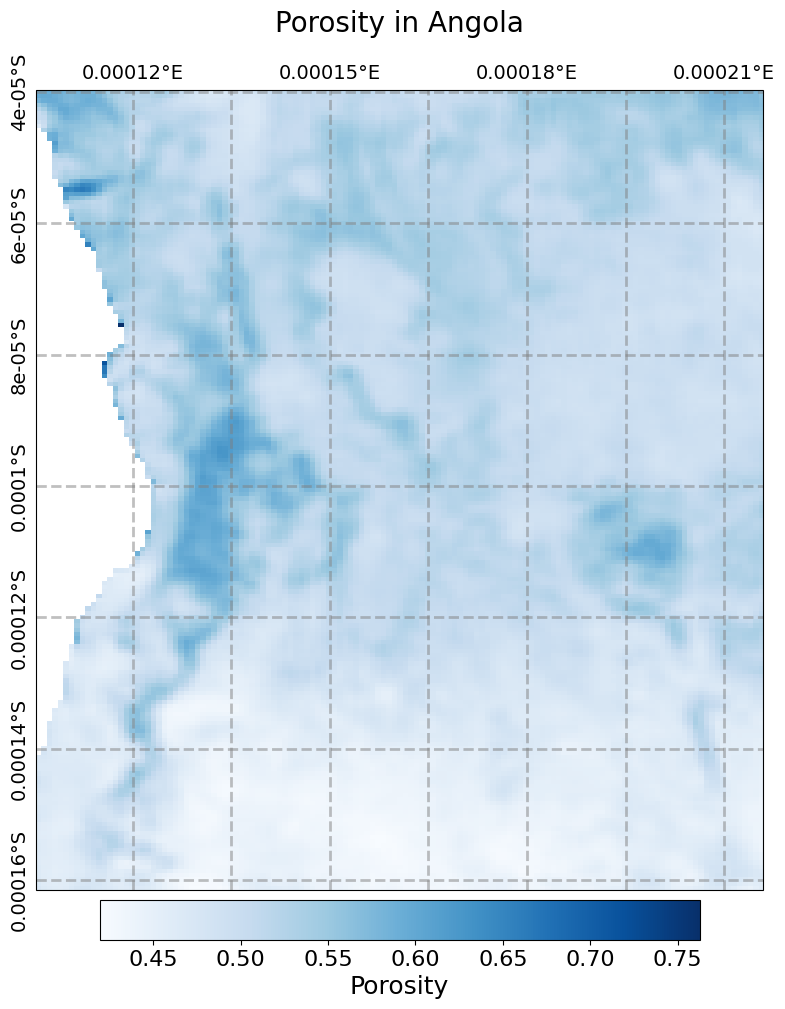

In [27]:
fig = plt.figure(figsize=(10, 10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.epsg(3857)) 

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                xlabel_style={'size': 14}) #TODO: insert line styles later

gl.xlabels_bottom = False
gl.ylabels_right = False

plot = ax.imshow(porosity_angola, cmap='Blues', extent=img_extent)

cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
cbar = plt.colorbar(plot, cax=cbar_ax, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Porosity', fontsize=18)

fig.suptitle("Porosity in Angola", fontsize=20)

plt.savefig(f'../results/figures/porosity_angola.png', dpi=300, bbox_inches='tight')